In [2]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot
%matplotlib inline

教師あり学習を評価するには、train_test_split関数を呼び出してデータセットを訓練セットとテストセットに分割し、訓練セットに対してfitメソッドを適用して、テストセットに対してはscoreメソッドを呼び出して評価してきた  
モデルは未知のデータに対して、精度よく予測しなければならない。つまりモチベーションは汎化性能の向上である。

In [32]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train ,X_test, y_train,y_test = train_test_split(X, y, random_state=0)
print('X train shape: {}'.format(X_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('y test shape: {}'.format(y_test.shape))

logreg = LogisticRegression().fit(X_train, y_train)
print('Test set score: {:,.2f}'.format(logreg.score(X_test, y_test)))

X train shape: (75, 2)
y train shape: (75,)
X test shape: (25, 2)
y test shape: (25,)
Test set score: 0.88


# Cross-Validation(交差検証)
データセットを訓練セットとテストセットにただ分割するよりもより徹底して汎化性能を評価する統計的手法。  
**k分割交差検証(k-hold cross-validation)**がよく用いられる。  
kはユーザーが決めるパラメータであり、データセットをk個に分割して、一つをテストセットとして用いて残りをk-1個を訓練セットに用いる。ｋ個に分割したデータセットがテストセットになるように評価を繰り返して、最終的にk個の精度を手に入れる。  
  
Cross-Validationはランダムサンプリングを繰り返して**平均をとることを繰り返せば、分布は母集団の平均**に近く中心極限定理を思い出せば、直感的な理解に役立つ。つまり訓練セット間のデータのばらつきを抑えることができる

/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/pyplot.py:2795: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


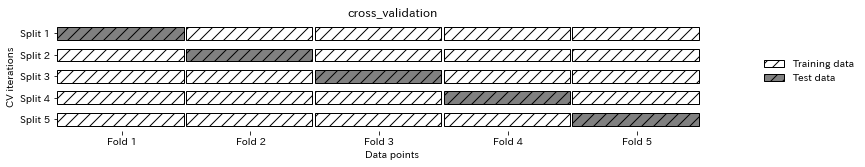

In [33]:
mglearn.plots.plot_cross_validation()

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
#kはデフォルトで3
scores = cross_val_score(logreg, iris.data, iris.target)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


In [35]:
#k=5
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


In [36]:
#一般には平均をとる
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Cross-validation scores: {}'.format(scores.mean()))

Cross-validation scores: 0.9600000000000002


分割間で精度にバラつきが大きい。このモデルは訓練に用いられた特定の分割に強く依存していることを示すが、ただデータセットが小さ過ぎるせいなのかもしれない

## 層化ｋ分割交差検証(startified k-hold cross-validation)
もしデータがランダムに並んでいるのではなく、規則正しく並んでいる場合に単純なk分割交差検証を行うと、データセットに一部のデータしか含まれないことになり正しく交差検証ができなくなる。これを解決するために、sklaenでは単純なk分割交差検証を行わずに、分割したデータセット内でのクラスの比率が等しくなるように抽出を行う、層化ｋ分割交差検証を用いる。

In [17]:
print('Iris lavels: {}'.format(iris.target))

Iris lavels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-p

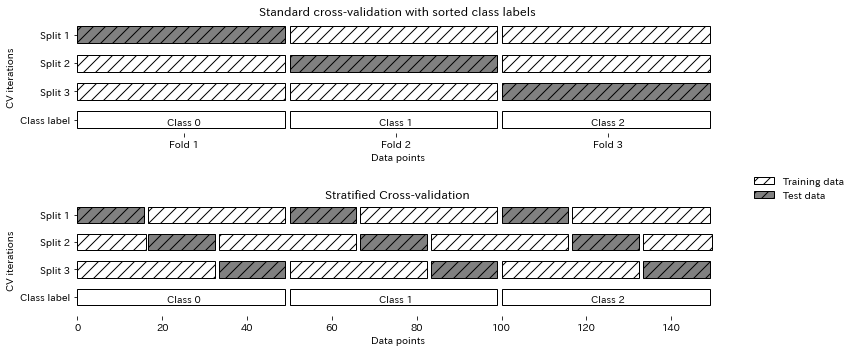

In [18]:
mglearn.plots.plot_stratified_cross_validation()

CVパラメータに、交差検証分割器を与えることでより詳細に交差検証を操作することができる。

In [22]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [23]:
kfold = KFold(n_splits=3)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0. 0. 0.]


個々の分割がirisデータセットの個々のクラスに対応しているので、何も学習することができない。この問題を解決する別の方法として、データをシャッフルしてサンプルがラベル順に並ばないようにすればよい。

In [24]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.9  0.96 0.96]


層化ｋ分割交差検証を行う場合。ランダムにデータセットを並び替えて、かつ訓練セットとテストセットにクラスが同じ比率で含まれるようにする

In [53]:
from sklearn.model_selection import StratifiedKFold
sfold = StratifiedKFold(n_splits=3, shuffle=True,random_state=3)
scores = cross_val_score(logreg, iris.data, iris.target, cv=sfold )
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.98039216 0.94117647 0.95833333]


## 一つ抜き交差検証(leave-one-out)
k分割交差検証の個々の分割が1サンプルしかないもので、大規模データセットに対しては時間がかかるが、小規模データセットに対してはより良い評価ができる

In [26]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('Number of cv iterations: {}'.format(len(scores)))
print('Mean acuurancy: {:,.2f}'.format(scores.mean()))

Number of cv iterations: 150
Mean acuurancy: 0.95


## シャッフル分割交差検証(shuffle-split cross-validation)
毎回train_size個の点を選び出して訓練セットとして、test_size個(訓練セットと重複しない)点をテストセットとする。これをn_iter回繰り返す。  
下図は10点からなるデータセットを訓練セットサイズ5個、テストセットサイズ2個で4回繰り返した図である。

/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


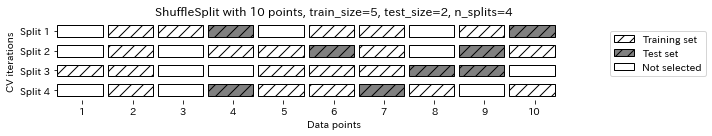

In [27]:
mglearn.plots.plot_shuffle_split()

In [30]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.90666667 0.93333333 0.93333333 0.86666667 0.93333333 0.94666667
 0.96       0.96       0.94666667 0.94666667]


train_sizeとtest_sizeの和が1とならないようにすることで、データセットの一部だけを用いるようにすることもできる。これをサブサンプリングといい、大規模データセットで有用である。  
ShuffleSplitにも層化サンプリング(StratifiedShuffleSplit)が存在し、クラス分類タスクにおいてはより信頼できる結果を得られる。

## グループつき交差検証
例えば、顔画像から感情を認識するシステムを作るとする。このクラス分類器の目標はデータセットに属していない人の感情を画像から読み取ることである。この分類器の性能を評価するに層化交差検証を行うことも可能である。しかしそうすると、訓練セットにテストセットにも同じ人が含まれてしまう(層化交差検証は訓練とテストのデータセットのクラスが同じ比率になるようにサンプリングを行う)。クラス分類器にとって訓練セットに存在する人の感情を予測するのは、まったく見たことのない顔の感情を予想するよりもずっと簡単なはずだ。そうすると新しい顔に対する汎化性能を正しく評価できないことになる。    
この場合GroupKFolfを用いる。この関数は引数にgroupsという訓練セットとテストセットを分離するのに分割してはいけないクラスを指定した配列を受け取り、データセットのサンプリングを行う。  
このようにデータセットの中に、密接に関係するグループがある場合に訓練とテストのデータセットに含まれている人の顔が被らないようにしてサンプリングを行う方法がグループつき交差検証である

In [3]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

#最初の3サンプルが同じグループに、次の4つが同じグループに.....というように分割されるようにする
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print('Number of cv iterations: {}'.format(scores))

NameError: name 'make_blobs' is not defined

/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


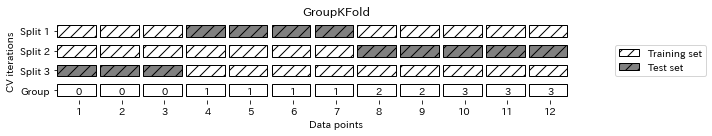

In [45]:
mglearn.plots.plot_group_kfold()

In [27]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
groups = np.array([0, 0, 2, 2]) #groupを分割するための割付IDなので([0,0,1,1])でも変わらない。このインデックス順でグループとする
group_kfold = GroupKFold(n_splits=2)
group_kfold.get_n_splits(X, y, groups)

2

In [34]:
GroupKFold(n_splits=2)
for folds_, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    print('folds:{}'.format(str(folds_+1)))
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('X_train: \n{}'.format(X_train))
    print('X_test: \n{}'.format(X_test))
    print('y_train: {}'.format(y_train))
    print('y_test: {}'.format(y_test))

folds:1
TRAIN: [0 1] TEST: [2 3]
X_train: 
[[1 2]
 [3 4]]
X_test: 
[[5 6]
 [7 8]]
y_train: [1 2]
y_test: [3 4]
folds:2
TRAIN: [2 3] TEST: [0 1]
X_train: 
[[5 6]
 [7 8]]
X_test: 
[[1 2]
 [3 4]]
y_train: [3 4]
y_test: [1 2]


# まとめ
- 基本的に用いるのはKFold,StatifiedKFolf、GroupKFoldである